In [1]:
#####################################
# ML Algorithms on our URL features #
#####################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read csv
features = pd.read_csv('../Data/features.csv')
label_data = pd.read_csv('../Data/merged_whois_urls.csv')

In [3]:
# Checking
features.head()

,whois_regDate,whois_expDate,number_of.,url_length,number_of_digits,number_of_special_charac,number_of-,number_of//,number_of/,number_of@,HTTP_check,number_of_protocols,number_of_subdomains,IP_in_url,number_of_.com,Port_in_URL,number_of_www,short_URL
0,9794,1527,2,23,0,0,0,1,3,0,0,1,0,0,1,0,1,0
1,7084,220,2,24,0,0,0,1,3,0,0,1,0,0,1,0,1,0
2,9964,3185,2,25,0,0,0,1,3,0,0,1,0,0,1,0,1,0
3,9038,823,2,21,0,0,0,1,3,0,1,1,0,0,1,0,1,0
4,8578,187,2,26,0,0,0,1,3,0,0,1,0,0,0,0,1,0


In [4]:
label_data.head()

,URL,label
0,https://www.google.com/,0
1,https://www.youtube.com/,0
2,https://www.facebook.com/,0
3,http://www.baidu.com/,0
4,https://www.wikipedia.org/,0


In [5]:
# X and y values
X = features.iloc[:, [0,1,2,3,4,5,6,7,8,9,10,12,13,14,16]].values # Dropped column 11,15 and 17
y = label_data.iloc[:, [1]].values

In [6]:
# Checking
print(f'X shape: {X.shape}')
print(f'y shape: {y.shape}')

X shape: (16800, 15)
y shape: (16800, 1)


In [7]:
# Training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [8]:
# Checking
print(f'X train shape: {X_train.shape}')
print(f'X test shape: {X_test.shape}')
print(f'y train shape: {y_train.shape}')
print(f'y test shape: {y_test.shape}')

X train shape: (13440, 15)
X test shape: (3360, 15)
y train shape: (13440, 1)
y test shape: (3360, 1)


In [9]:
#
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
# Models 
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Define the model
res_1 = DecisionTreeClassifier(random_state=0)

# Fit the model
res_1.fit(X_train, y_train)

# Get predictions
prediction_1 = res_1.predict(X_test)

In [11]:
# Support Vector Machines
from sklearn.svm import SVC

# Define the model
res_2 = SVC(kernel='linear', random_state=0)

# Fit the model
res_2.fit(X_train,y_train)

# Get Predictions
prediction_2 = res_2.predict(X_test)

/home/pedro/.cache/activestate/ed89c924/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [12]:
# Support Vector Machines - Kernel
# Define the model
res_3 = SVC(kernel='rbf', random_state=0)

# Fit the model
res_3.fit(X_train,y_train)

# Get Predictions
prediction_3 = res_3.predict(X_test)

/home/pedro/.cache/activestate/ed89c924/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [13]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Define the model
res_4 = RandomForestClassifier(n_estimators=20, criterion='entropy', random_state=0)

# Fit the model
res_4.fit(X_train, y_train)

# Get Predictions
prediction_4 = res_4.predict(X_test)

/tmp/ipykernel_2420/4001306623.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  res_4.fit(X_train, y_train)


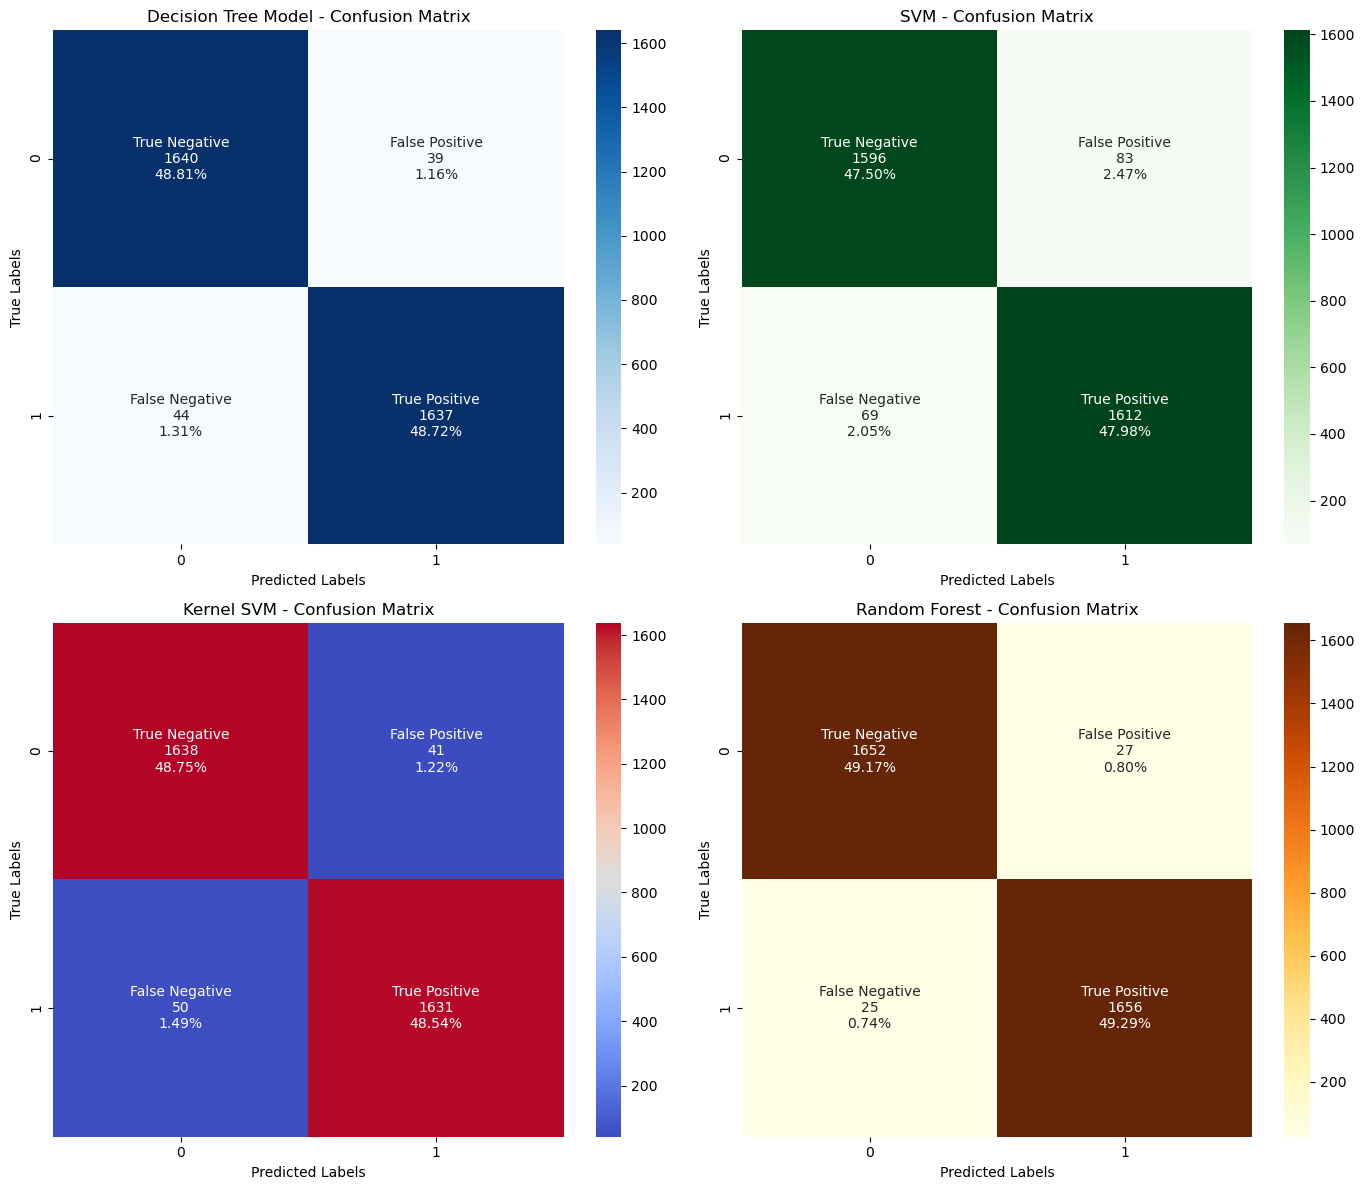

Decision Tree Accuracy  : 0.975297619047619
SVM Accuracy            : 0.9547619047619048
Kernel SVM Accuracy     : 0.9729166666666667
Random Forest Accuracy  : 0.9845238095238096


In [14]:
# Result Analysis
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Confusion Matrix from every model
cm_1 = confusion_matrix(y_test, prediction_1)
cm_2 = confusion_matrix(y_test, prediction_2)
cm_3 = confusion_matrix(y_test, prediction_3)
cm_4 = confusion_matrix(y_test, prediction_4)

def create_labels(cm):
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
    return np.asarray(labels).reshape(2,2)

labels_1 = create_labels(cm_1)
labels_2 = create_labels(cm_2)
labels_3 = create_labels(cm_3)
labels_4 = create_labels(cm_4)

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Decision Tree Matrix
sns.heatmap(cm_1, annot=labels_1, fmt='', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('Decision Tree Model - Confusion Matrix')
axes[0, 0].set_xlabel('Predicted Labels')
axes[0, 0].set_ylabel('True Labels')

# SVM Matrix
sns.heatmap(cm_2, annot=labels_2, fmt='', cmap='Greens', ax=axes[0, 1])
axes[0, 1].set_title('SVM - Confusion Matrix')
axes[0, 1].set_xlabel('Predicted Labels')
axes[0, 1].set_ylabel('True Labels')

# Kernel SVM Matrix
sns.heatmap(cm_3, annot=labels_3, fmt='', cmap='coolwarm', ax=axes[1, 0])
axes[1, 0].set_title('Kernel SVM - Confusion Matrix')
axes[1, 0].set_xlabel('Predicted Labels')
axes[1, 0].set_ylabel('True Labels')

# Random Forest Matrix
sns.heatmap(cm_4, annot=labels_4, fmt='', cmap='YlOrBr', ax=axes[1, 1])
axes[1, 1].set_title('Random Forest - Confusion Matrix')
axes[1, 1].set_xlabel('Predicted Labels')
axes[1, 1].set_ylabel('True Labels')

# Adjust layout
plt.tight_layout()
plt.show()

# Accuracy from every model
# Decision Tree
accuracy_1 = accuracy_score(y_test, prediction_1)

# SVM
accuracy_2 = accuracy_score(y_test, prediction_2)

# Kernel SVM
accuracy_3 = accuracy_score(y_test, prediction_3)

# Random Forest
accuracy_4 = accuracy_score(y_test, prediction_4)

print(f'Decision Tree Accuracy  : {accuracy_1}')
print(f'SVM Accuracy            : {accuracy_2}')
print(f'Kernel SVM Accuracy     : {accuracy_3}')
print(f'Random Forest Accuracy  : {accuracy_4}')

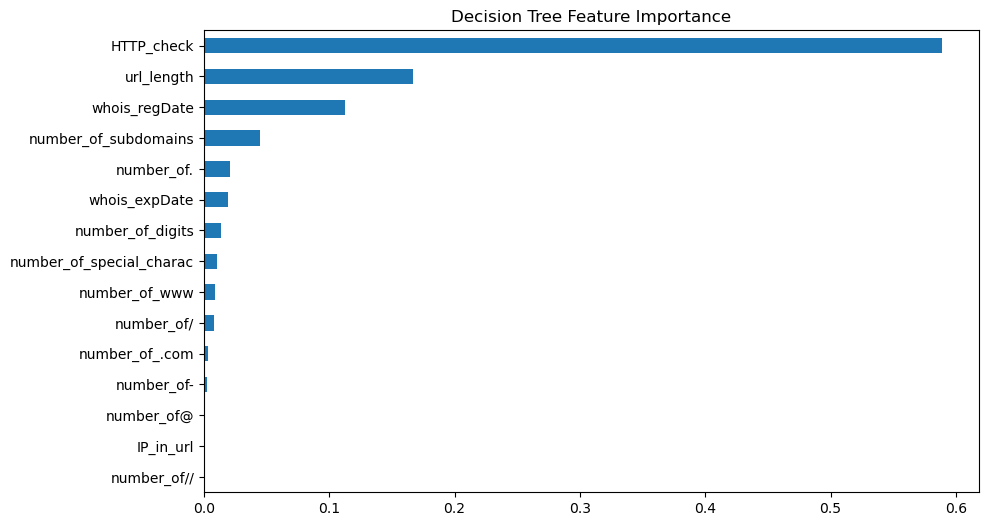

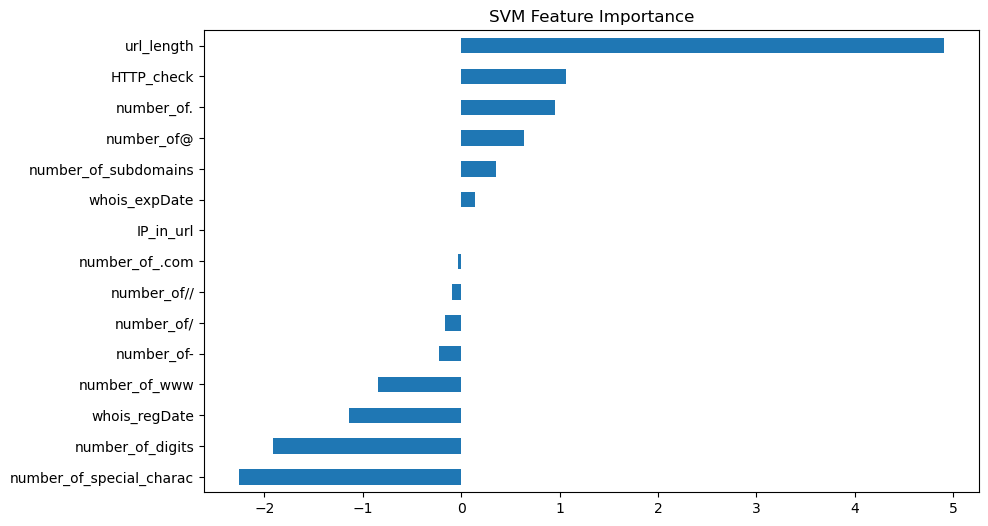

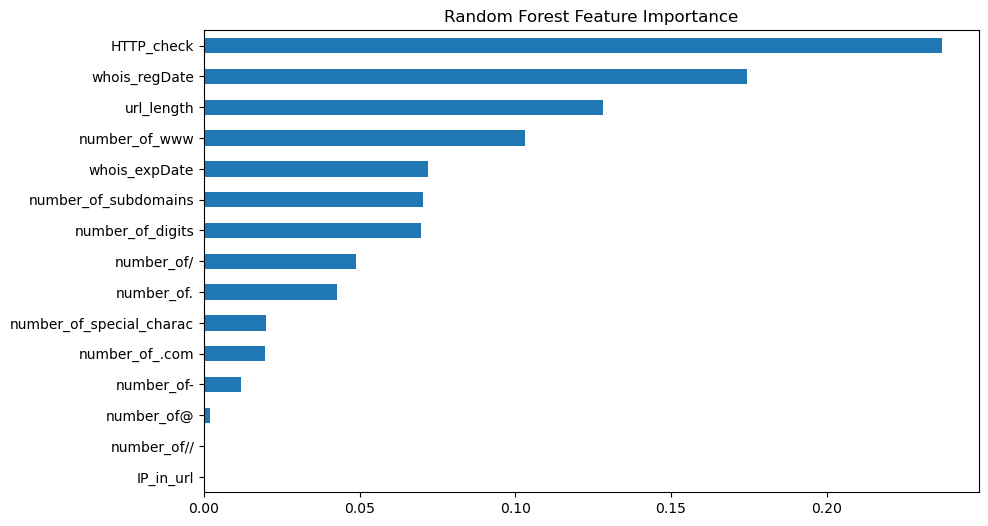

In [15]:
# Features importance by model (excluding Kernel SVM)

# Converting X_train to DataFrame
X_train_df = pd.DataFrame(X_train, columns=['whois_regDate', 'whois_expDate', 'number_of.', 'url_length', 'number_of_digits', 'number_of_special_charac', 'number_of-', 'number_of//', 'number_of/', 'number_of@', 'HTTP_check', 'number_of_subdomains', 'IP_in_url', 'number_of_.com', 'number_of_www'])

# Decision Tree Model
feat_importances_1 = pd.Series(res_1.feature_importances_, index=X_train_df.columns)
feat_importances_1.sort_values().plot(kind="barh", figsize=(10, 6), title="Decision Tree Feature Importance")

plt.show()

# SVM Model
if hasattr(res_2, 'coef_'):
    feat_importances_2 = pd.Series(res_2.coef_[0], index=X_train_df.columns)
    feat_importances_2.sort_values().plot(kind="barh", figsize=(10, 6), title="SVM Feature Importance")

    plt.show()
else:
    print("Feature importances not available for non-linear SVM models.")

# Random Forest Model
feat_importances_4 = pd.Series(res_4.feature_importances_, index=X_train_df.columns)
feat_importances_4.sort_values().plot(kind="barh",figsize=(10, 6), title="Random Forest Feature Importance")

plt.show()

In [16]:
# Final Model
final_model = res_4

In [18]:
# Save Model
import joblib

joblib.dump (final_model, '../Deploy/final_model.pkl')

['../Deploy/final_model.pkl']